In [2]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scipy
!pip install seaborn

/tmp/ipython-input-3-1861049642.py:13: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/METABRIC_RNA_Mutation.csv.zip")  # Update the path if needed
/usr/local/lib/python3.11/dist-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


   patient_id  age_at_diagnosis type_of_breast_surgery    cancer_type  \
0           0             75.65             MASTECTOMY  Breast Cancer   
1           2             43.19      BREAST CONSERVING  Breast Cancer   
2           5             48.87             MASTECTOMY  Breast Cancer   
3           6             47.68             MASTECTOMY  Breast Cancer   
4           8             76.97             MASTECTOMY  Breast Cancer   

                        cancer_type_detailed cellularity  chemotherapy  \
0           Breast Invasive Ductal Carcinoma         NaN             0   
1           Breast Invasive Ductal Carcinoma        High             0   
2           Breast Invasive Ductal Carcinoma        High             1   
3  Breast Mixed Ductal and Lobular Carcinoma    Moderate             1   
4  Breast Mixed Ductal and Lobular Carcinoma        High             1   

  pam50_+_claudin-low_subtype  cohort er_status_measured_by_ihc  ... mtap_mut  \
0                 claudin-low     1

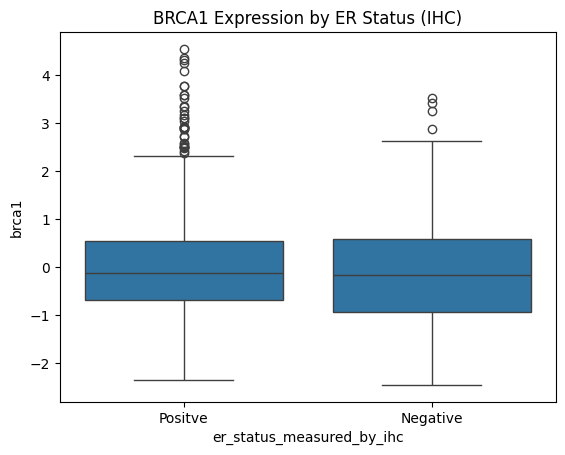

/usr/local/lib/python3.11/dist-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: After omitting NaNs, one or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)
/usr/lo

                            Gene  p_value  mean_diff
0               age_at_diagnosis      NaN        NaN
1                   chemotherapy      NaN        NaN
2                         cohort      NaN        NaN
3      neoplasm_histologic_grade      NaN        NaN
4                hormone_therapy      NaN        NaN
5  lymph_nodes_examined_positive      NaN        NaN
6                 mutation_count      NaN        NaN
7    nottingham_prognostic_index      NaN        NaN
8        overall_survival_months      NaN        NaN
9               overall_survival      NaN        NaN
Top 50 genes selected for PCA: ['age_at_diagnosis', 'chemotherapy', 'cohort', 'neoplasm_histologic_grade', 'hormone_therapy']...
Shape after dropping rows with NaNs in top genes: (1310, 50)


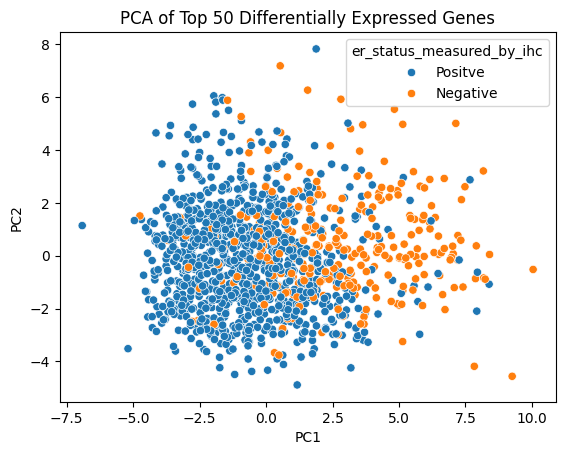


Conclusion:

- Analyzed 691 genes from the METABRIC dataset.
- Identified genes with significant expression differences between ER+ and ER- samples.
- Visualized individual gene differences using a boxplot.
- Used PCA to show how gene expression profiles cluster samples based on ER status.
- Demonstrates practical bioinformatics and data analysis for breast cancer research.



In [3]:
# 1. Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 2. Load the CSV file

df = pd.read_csv("/content/METABRIC_RNA_Mutation.csv.zip")  # Update the path if needed
print(df.head())

# 3. Check columns and split into clinical and gene columns

print(df.columns)

clinical_cols = ['patient_id', 'er_status_measured_by_ihc']
gene_cols = [col for col in df.columns if col not in clinical_cols]

print(f"Number of genes: {len(gene_cols)}")

# 4. T-test and boxplot for one example gene

gene = 'brca1'

er_positive = df[df['er_status_measured_by_ihc'] == 'Positive'][gene]
er_negative = df[df['er_status_measured_by_ihc'] == 'Negative'][gene]

t_stat, p_val = ttest_ind(er_positive, er_negative, nan_policy='omit')
print(f"T-test for {gene.upper()}: p-value = {p_val:.5f}")

sns.boxplot(x='er_status_measured_by_ihc', y=gene, data=df)
plt.title(f'{gene.upper()} Expression by ER Status (IHC)')
plt.show()

# 5. Compute t-tests for all genes to find top genes

results = []
for gene in gene_cols:
    try:
        pos = df[df['er_status_measured_by_ihc'] == 'Positive'][gene]
        neg = df[df['er_status_measured_by_ihc'] == 'Negative'][gene]
        t_stat, p_val = ttest_ind(pos, neg, nan_policy='omit')
        mean_diff = pos.mean() - neg.mean()
        results.append({'Gene': gene, 'p_value': p_val, 'mean_diff': mean_diff})
    except:
        continue

res_df = pd.DataFrame(results)
res_df = res_df.sort_values('p_value')
print(res_df.head(10))

# 6. PCA on top genes

top_genes = res_df.head(50)['Gene'].tolist()
print(f"Top 50 genes selected for PCA: {top_genes[:5]}...")

df_top_clean = df[top_genes].dropna()
print(f"Shape after dropping rows with NaNs in top genes: {df_top_clean.shape}")

scaler = StandardScaler()
scaled_expr = scaler.fit_transform(df_top_clean)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_expr)

df_pca = df.loc[df_top_clean.index].copy()
df_pca['PC1'] = pca_result[:, 0]
df_pca['PC2'] = pca_result[:, 1]

sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='er_status_measured_by_ihc')
plt.title('PCA of Top 50 Differentially Expressed Genes')
plt.show()

# 7. Conclusion

print("\nConclusion:")
print(f"""
- Analyzed {len(gene_cols)} genes from the METABRIC dataset.
- Identified genes with significant expression differences between ER+ and ER- samples.
- Visualized individual gene differences using a boxplot.
- Used PCA to show how gene expression profiles cluster samples based on ER status.
- Demonstrates practical bioinformatics and data analysis for breast cancer research.
""")
